In [7]:
import gzip
import urllib
import os
import numpy as np
os.listdir()

['.git',
 '.ipynb_checkpoints',
 'logistic regression.ipynb',
 'README.md',
 't10k-images-idx3-ubyte.gz',
 't10k-labels-idx1-ubyte.gz',
 'train-images-idx3-ubyte.gz',
 'train-labels-idx1-ubyte.gz']

In [39]:
def load_dataset():
    #----------------downloads necessary files if not in directory---------------------------    
    link='http://yann.lecun.com/exdb/mnist/'
    filenames=['train-images-idx3-ubyte.gz','train-labels-idx1-ubyte.gz','t10k-images-idx3-ubyte.gz','t10k-labels-idx1-ubyte.gz']
    for filename in filenames:
        if filename not in os.listdir():
            print('downloading '+str(filename))
            urllib.request.urlretrieve(link+filename, filename)
            
    #---------------------load datasets from file in directory-------------------------------

    def load_image(filename):
        with gzip.open(filename,'rb') as f:
            buffer=f.read()
            data=np.frombuffer(buffer,dtype=np.int8,offset=16)
            data=data.reshape(-1,28,28)  
        return data

    def load_label(filename):
        with gzip.open(filename,'rb') as f:
            buffer=f.read()
            data=np.frombuffer(buffer,dtype=np.int8,offset=8)
        return data

    x_train=load_image(filenames[0])
    y_train=load_label(filenames[1])
    x_test=load_image(filenames[2])
    y_test=load_label(filenames[3])
    return x_train,y_train,x_test,y_test


    

In [40]:
x_train,y_train,x_test,y_test=load_dataset()

In [43]:
print("X_train shape: ",x_train.shape)
print("y_train shape: ",y_train.shape)
print("X_test shape: ",x_test.shape)
print("y_test shape: ",y_test.shape)

X_train shape:  (60000, 28, 28)
y_train shape:  (60000,)
X_test shape:  (10000, 28, 28)
y_test shape:  (10000,)


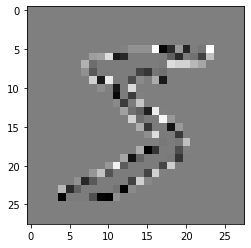

Its label:  5


In [46]:
#plot check
import matplotlib.pyplot as plt
plt.imshow(x_train[0],cmap='gray')
plt.show()
print('Its label: ',y_train[0])

In [ ]:
#normaliing
x_